Project 📚 💻 : Train and test a fullyconnected neural network for entire MNIST handwritten digit dataset.

Framework - Tensorflow

Himani Parikh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import interp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer

***Load the minst dataset***


---



In [ ]:
minst_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= minst_dataset.load_data()

print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

***Data Pre-Processing : Normalize(Min-Max scaling)***


---



In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

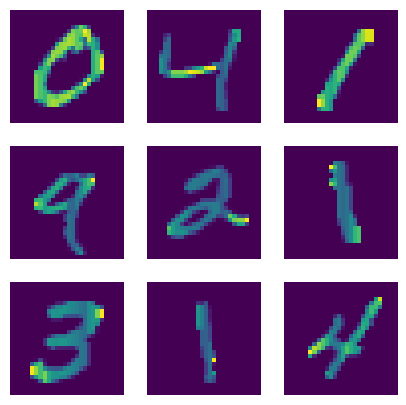

In [ ]:
plt.figure(figsize=(5,5))
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.axis('off')
  plt.imshow(x_train[i].squeeze())

***Create Fully connected with 2 hidden layers network model***


---



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 25)        100       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

***Training Model***


---



In [ ]:
model_history = model.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model.save('sample.model')

Epoch 1/10
469/469 [==============================] - 66s 134ms/step - loss: 0.2634 - accuracy: 0.9487
Epoch 2/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0648 - accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 4/10
469/469 [==============================] - 69s 146ms/step - loss: 0.0402 - accuracy: 0.9877
Epoch 5/10
469/469 [==============================] - 66s 139ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 64s 136ms/step - loss: 0.0283 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 59s 126ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 8/10
469/469 [==============================] - 57s 121ms/step - loss: 0.0217 - accuracy: 0.9928
Epoch 9/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 10/10
469/469 [==============================] - 57s 121ms/step - l

***Testing Model***


---



In [ ]:
s_model = tf.keras.models.load_model('sample.model')
loss, accuracy = s_model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 3s 10ms/step - loss: 0.0476 - accuracy: 0.9871
Test loss: 0.04761838540434837
Test accuracy: 98.71


<function matplotlib.pyplot.show(close=None, block=None)>

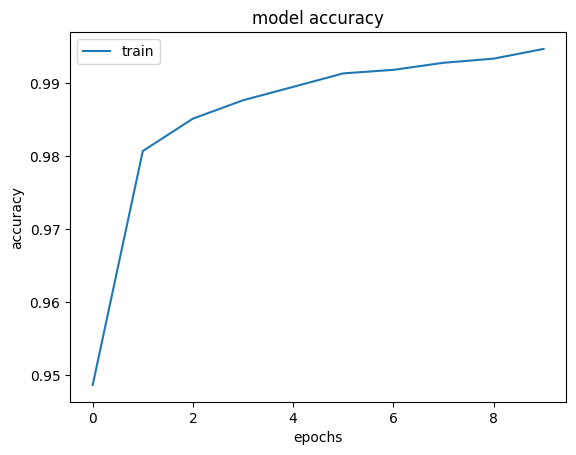

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

***Model Evaluation***

---



In [ ]:
y_prob = model.predict(x_test)
y_prob.shape
y_prob

313/313 [==============================] - 3s 9ms/step


array([[1.3254670e-15, 7.4667208e-15, 3.5729184e-10, ..., 9.9999994e-01,
        3.3265720e-15, 6.1723917e-13],
       [1.0366098e-06, 7.0103283e-07, 9.9999648e-01, ..., 3.4583753e-12,
        1.3800908e-08, 1.8460197e-11],
       [1.8405808e-08, 9.9988812e-01, 8.3175478e-10, ..., 4.8966626e-06,
        1.1629212e-07, 1.3763593e-05],
       ...,
       [7.1024754e-15, 2.3461777e-10, 4.7608338e-15, ..., 1.1792482e-07,
        9.6185315e-10, 1.7982048e-06],
       [1.9239096e-11, 8.2936702e-16, 4.1606983e-12, ..., 1.5614115e-15,
        1.8762996e-07, 1.2945275e-11],
       [8.9875041e-09, 1.3691190e-12, 2.3012637e-08, ..., 8.3034084e-14,
        1.9667550e-07, 5.7387722e-10]], dtype=float32)

In [ ]:
# converting the predictions probabilities to class label for all test data points
y_pred = [np.argmax(i) for i in y_prob]
print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
def f_performance(cm):
  FP = cm.sum(axis=0) - np.diag(cm)
  FP = FP.astype(float)
  FN = cm.sum(axis=1) - np.diag(cm)
  FN = FN.astype(float)
  TP = np.diag(cm)
  TP = TP.astype(float)
  TN = cm.sum() - (FP + FN + TP)
  TN = TN.astype(float)

  # Sensitivity
  TPR = TP/(TP+FN)
  # Specificity
  TNR = TN/(TN+FP)
  # Precision
  PPV = TP/(TP+FP)
  # False positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)

  for i in range(0,10):
    print("****************Performance of Class {}*********************". format(i))
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    print("Precision_class_{}: {}".format(i, PPV[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()

Accuracy 0.9871
*********classification_report*******************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



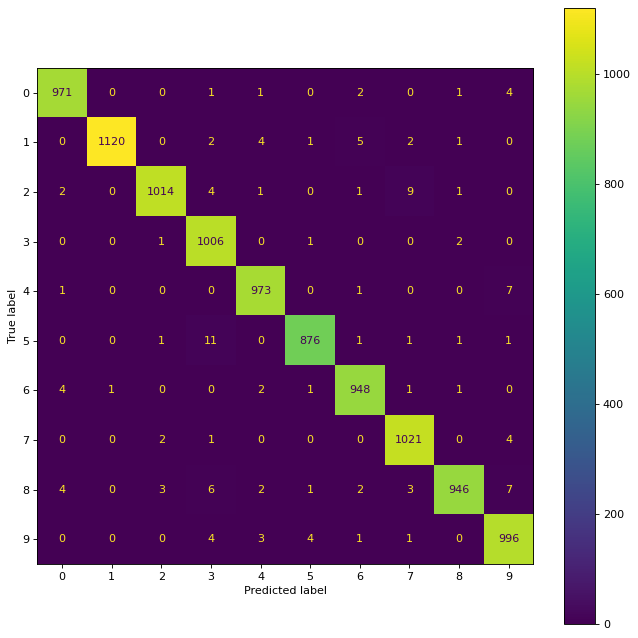

In [ ]:
score = accuracy_score(y_test, y_pred)
print("Accuracy", score)
print("*********classification_report*******************")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':80})

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print()

In [ ]:
f_performance(cm)

****************Performance of Class 0*********************
Sensitivity_class_0: 0.9908163265306122
Specificity_class_0: 0.998780487804878
Precision_class_0: 0.9887983706720977
F1_score_class_0: 0.9898063200815495

****************Performance of Class 1*********************
Sensitivity_class_1: 0.986784140969163
Specificity_class_1: 0.9998871968415116
Precision_class_1: 0.9991079393398751
F1_score_class_1: 0.9929078014184396

****************Performance of Class 2*********************
Sensitivity_class_2: 0.9825581395348837
Specificity_class_2: 0.9992194469223907
Precision_class_2: 0.9931439764936337
F1_score_class_2: 0.9878226984900145

****************Performance of Class 3*********************
Sensitivity_class_3: 0.996039603960396
Specificity_class_3: 0.9967741935483871
Precision_class_3: 0.9719806763285024
F1_score_class_3: 0.9838630806845965

****************Performance of Class 4*********************
Sensitivity_class_4: 0.9908350305498982
Specificity_class_4: 0.9985584386781992

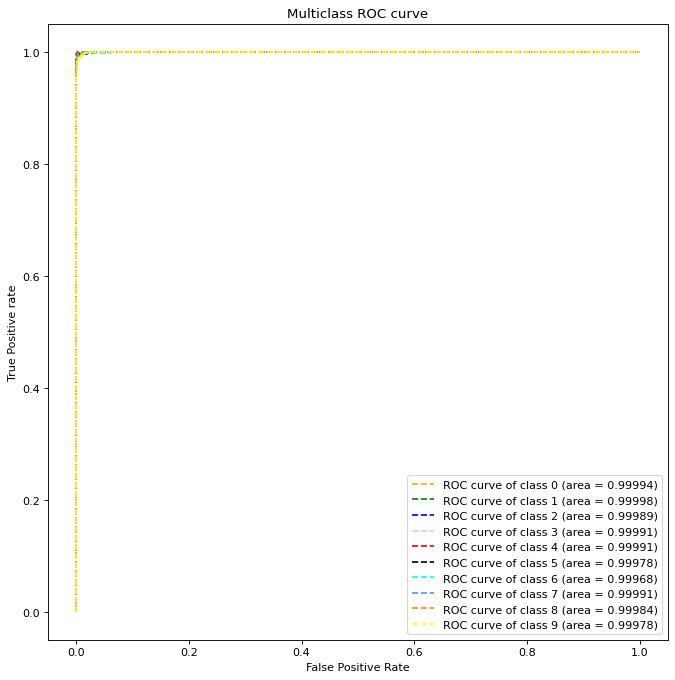

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 10

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i]=auc(fpr[i],tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC curve of class {0} (area = {1:0.005})'
            ''.format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(3, roc_auc[3]))
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(4, roc_auc[4]))
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(5, roc_auc[5]))
plt.plot(fpr[6], tpr[6], linestyle='--',color='aqua', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(6, roc_auc[6]))
plt.plot(fpr[7], tpr[7], linestyle='--',color='cornflowerblue', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(7, roc_auc[7]))
plt.plot(fpr[8], tpr[8], linestyle='--',color='darkorange', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(8, roc_auc[8]))
plt.plot(fpr[9], tpr[9], linestyle='--',color='yellow', label='ROC curve of class {0} (area = {1:0.005})'
             ''.format(9, roc_auc[9]))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

7


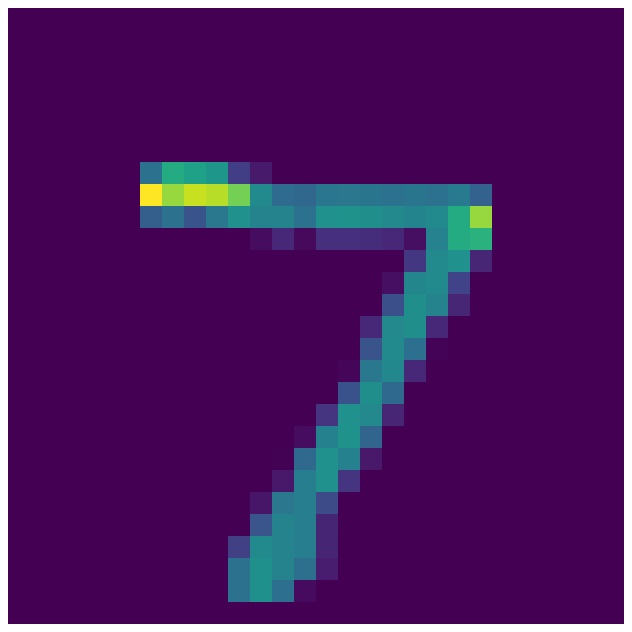

In [ ]:
plt.imshow(x_test[0].squeeze())
plt.axis('off')
print(np.argmax(y_prob[0]))

3


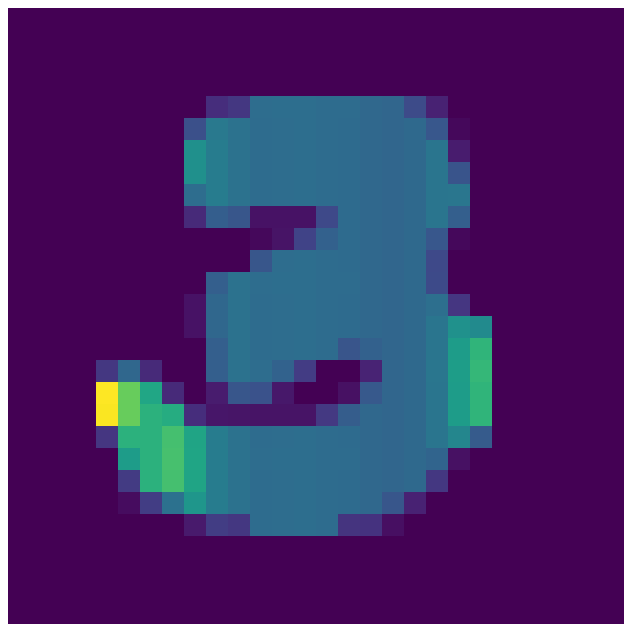

In [ ]:
plt.imshow(x_test[200].squeeze())
plt.axis('off')
print(np.argmax(y_prob[200]))

Model1 - With 1 Convoluation Layer

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))
model1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 batch_normalization_2 (Bat  (None, 26, 26, 25)        100       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 25)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4225)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                42260     
                                                                 
Total params: 42610 (166.45 KB)
Trainable params: 4256

In [ ]:
model_history1 = model1.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model1.save('sample1.model')

Epoch 1/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1960 - accuracy: 0.9414
Epoch 2/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1088 - accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0938 - accuracy: 0.9713
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0790 - accuracy: 0.9756
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0769 - accuracy: 0.9762
Epoch 7/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0703 - accuracy: 0.9776
Epoch 8/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0681 - accuracy: 0.9782
Epoch 9/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0643 - accuracy: 0.9802
Epoch 10/10
469/469 [==============================] - 32s 68ms/step - loss: 0.061

In [ ]:
s_model1 = tf.keras.models.load_model('sample1.model')
loss, accuracy = s_model1.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 2s 7ms/step - loss: 0.1057 - accuracy: 0.9687
Test loss: 0.10574112832546234
Test accuracy: 96.87


<function matplotlib.pyplot.show(close=None, block=None)>

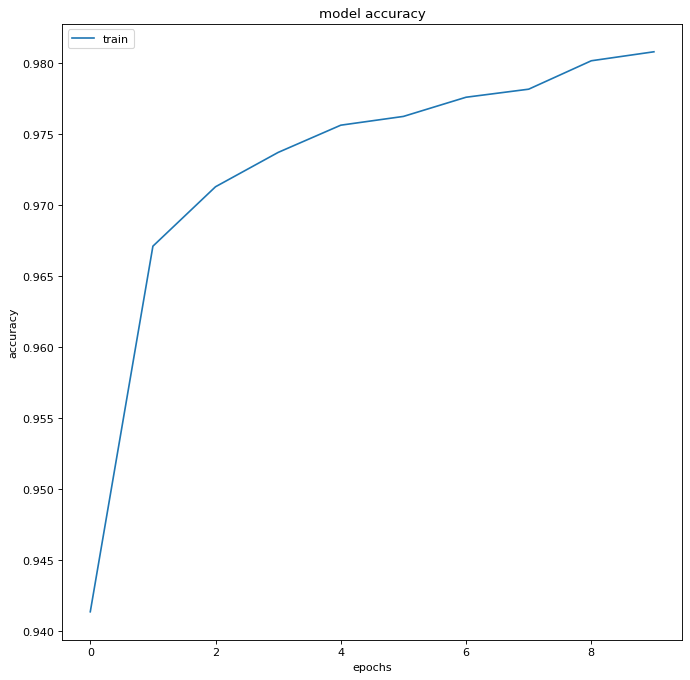

In [ ]:
plt.plot(model_history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

Model 2 - Fully connected layer without Conv

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_histo = model2.fit(x_train, y_train, batch_size = 128, epochs=10)
print("The model has successfully trained")

model2.save('sample2.model')

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8004 - accuracy: 0.8186
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.8819
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8921
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3725 - accuracy: 0.8983
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.9024
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3430 - accuracy: 0.9054
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.9084
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.9096
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3201 - accuracy: 0.9117
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.9130

In [ ]:
s_model2 = tf.keras.models.load_model('sample2.model')
loss, accuracy = s_model2.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', np.round((accuracy)*100, 2))

313/313 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 0.9168
Test loss: 0.3039500117301941
Test accuracy: 91.68


<function matplotlib.pyplot.show(close=None, block=None)>

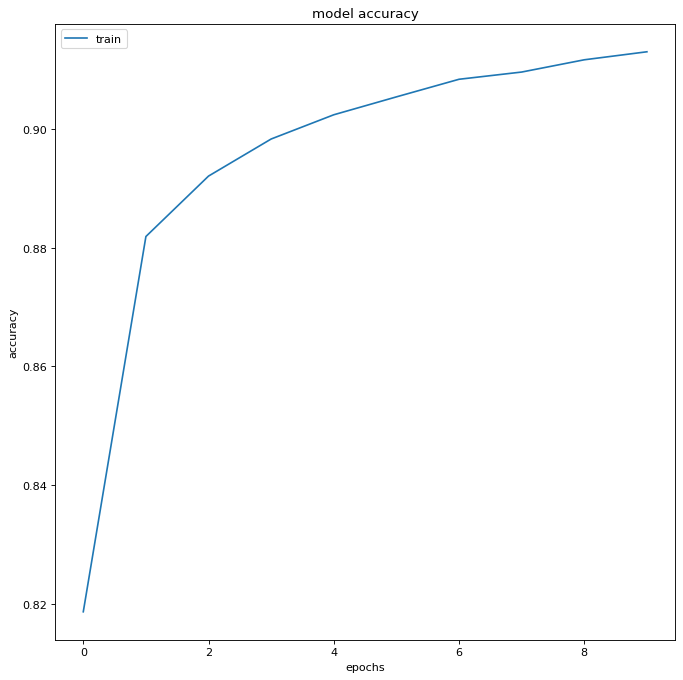

In [ ]:
plt.plot(model_histo.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show